### Loading Data

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('output/data_merged_cleaned.csv')
display(df.head())

,date,aqi_pm2.5,temp_max_c,temp_avg_c,temp_min_c,dew_point_max_c,dew_point_avg_c,dew_point_min_c,humidity_max_percent,humidity_avg_percent,humidity_min_percent,wind_speed_max_mph,wind_speed_avg_mph,wind_speed_min_mph,pressure_max_in,pressure_avg_in,pressure_min_in,month,precip_mm,temp_range,season_Autumn,season_Spring,season_Summer,season_Winter,rain_heavy,rain_light,rain_moderate,rain_none
0,2019-06-01,222.0,46.111111,38.333333,31.111111,17.777778,13.444444,3.888889,40.0,24.6,10.0,18.0,4.2,0.0,28.8,28.8,28.7,6.0,0.0,17.4,False,False,True,False,False,False,False,True
1,2019-06-02,170.0,46.111111,37.944444,30.000000,17.777778,16.166667,13.888889,45.0,28.6,16.0,9.0,5.9,0.0,28.9,28.8,28.7,6.0,0.0,16.7,False,False,True,False,False,False,False,True
2,2019-06-04,153.0,41.111111,33.388889,27.222222,22.222222,17.944444,13.888889,52.0,40.1,29.0,20.0,9.8,0.0,28.8,28.8,28.7,6.0,0.3,12.9,False,False,True,False,False,True,False,False
3,2019-06-05,157.0,43.888889,34.888889,27.777778,20.000000,15.833333,11.111111,55.0,34.1,15.0,15.0,8.3,0.0,28.8,28.8,28.8,6.0,0.0,14.9,False,False,True,False,False,False,False,True
4,2019-06-06,129.0,42.222222,35.000000,27.777778,15.000000,11.666667,8.888889,42.0,26.0,15.0,16.0,10.1,5.0,28.9,28.8,28.8,6.0,0.0,14.1,False,False,True,False,False,False,False,True


### Split Into Required Sets

In [4]:
from sklearn.model_selection import train_test_split

# Features
X = df.drop(columns=['aqi_pm2.5', 'date'])

# Target
y = df['aqi_pm2.5']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Apply Standard Scaler

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature scaling complete")

Feature scaling complete


### KNN Regression

Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best CV RMSE: 45.03551804348116
Test RMSE: 42.12
Test R²: 0.63


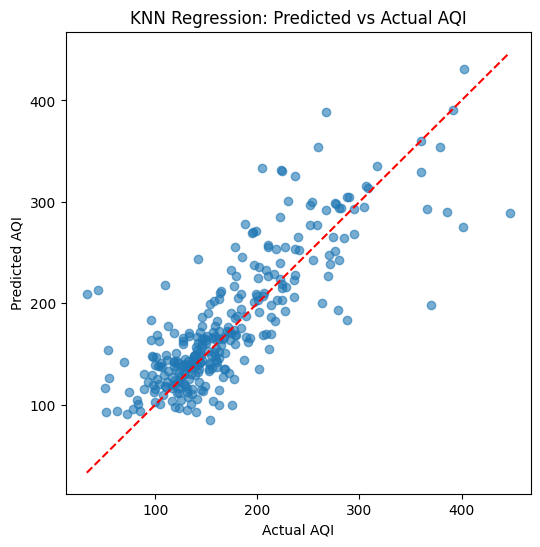

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best hyperparameters
best_knn = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)

# Evaluate on test set
y_pred = best_knn.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.2f}")

# Plot line of best fit
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("KNN Regression: Predicted vs Actual AQI")
plt.show()